## 调用高德Web服务API文档中所有功能
- [高德API文档](https://lbs.amap.com/api/webservice/guide/api/georegeo)

### 地理编码
> 地理编码/逆地理编码 API 是通过 HTTP/HTTPS 协议访问远程服务的接口，提供结构化地址与经纬度之间的相互转化的能力。

- 通过获取到的地理编码，可以进行POI推荐。

#### 获取地理编码geocode

In [25]:
import requests
key_nav ="d874136fcd77741f3cad8d66bd30a592"

In [26]:
import pandas as pd

In [27]:
def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url="https://restapi.amap.com/v3/geocode/geo?parameters"
    params={
        'key':key_nav,
        'address':address,
        'city':city,
        'batch':batch, # 批量查询控制 ture为批量查询，flase为单点查询
        'sig':sig,
        'output':'json' # 返回数据格式类型
    }
    response=requests.get(url,params=params) #有参数get请求  r = requests.get(url,params=params) 无参数get请求 r = requests.get(url)
    data = response.json()
    return data

In [28]:
佛山二中 = geocode('广东省佛山市禅城区华远西路12号') 
佛山二中

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'geocodes': [{'formatted_address': '广东省佛山市禅城区华远西路|12号',
   'country': '中国',
   'province': '广东省',
   'citycode': '0757',
   'city': '佛山市',
   'district': '禅城区',
   'township': [],
   'neighborhood': {'name': [], 'type': []},
   'building': {'name': [], 'type': []},
   'adcode': '440604',
   'street': '华远西路',
   'number': '12号',
   'location': '113.112840,23.005680',
   'level': '门牌号'}]}

#### 编码表格化

In [29]:
import pandas as pd
df = pd.json_normalize(佛山二中['geocodes'])
df

,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省佛山市禅城区华远西路|12号,中国,广东省,0757,佛山市,禅城区,[],440604,华远西路,12号,"113.112840,23.005680",门牌号,[],[],[],[]


### 路径规划
> 路径规划API是一套以HTTP形式提供的步行、公交、驾车查询及行驶距离计算接口，返回JSON 或 XML格式的查询数据，用于实现路径规划功能的开发。 
由于道路/数据/算法的变更，很可能存在间隔一段时间后请求相同起终点的经纬度返回不同结果。

- 计算机获取到起点和终点的坐标后，可能运用计算机视觉检索最短路径的流量等，结合路况选取最优路线。
- [路径规划算法参考](https://blog.csdn.net/kobesdu/article/details/98742080)

In [30]:
# 准备base url、params、response.json（） 
def walking(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':key_nav,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [31]:
#  准备walking 参数
力美健 = geocode('广东省佛山市禅城区季华五路16号季华新景园16号2楼')
力美健_location = 力美健['geocodes'][0]['location']
佛山二中_location = 佛山二中['geocodes'][0]['location']
print("(起点)佛山二中_location:",佛山二中_location,"(终点)力美健_location:",力美健_location)

(起点)佛山二中_location: 113.112840,23.005680 (终点)力美健_location: 113.114104,23.011464


In [32]:
# 路径规划
力美健 = walking(佛山二中_location,力美健_location)
力美健

{'status': '1',
 'info': 'ok',
 'infocode': '10000',
 'count': '1',
 'route': {'origin': '113.112840,23.005680',
  'destination': '113.114104,23.011464',
  'paths': [{'distance': '677',
    'duration': '542',
    'steps': [{'instruction': '沿华远西路向北步行495米右转',
      'orientation': '北',
      'road': '华远西路',
      'distance': '495',
      'duration': '396',
      'polyline': '113.113424,23.006068;113.113433,23.006619;113.113433,23.006619;113.11342,23.007483;113.11342,23.007483;113.11342,23.0077;113.11342,23.0077;113.11342,23.007917;113.11342,23.007917;113.113411,23.008694;113.113411,23.008694;113.113407,23.009275;113.113407,23.009275;113.113407,23.009579;113.113407,23.009579;113.113407,23.010299;113.113407,23.010299;113.113407,23.010334;113.113407,23.010334;113.113407,23.01056',
      'action': '右转',
      'assistant_action': [],
      'walk_type': '0'},
     {'instruction': '沿华远街向东步行17米左转',
      'orientation': '东',
      'road': '华远街',
      'distance': '17',
      'duration': '14',
    

In [33]:
# 实现路径规划
df = pd.json_normalize(力美健["route"]["paths"][0]['steps'])
display(df)
df["instruction"]

,instruction,orientation,road,distance,duration,polyline,action,assistant_action,walk_type
0,沿华远西路向北步行495米右转,北,华远西路,495,396,"113.113424,23.006068;113.113433,23.006619;113....",右转,[],0
1,沿华远街向东步行17米左转,东,华远街,17,14,"113.113403,23.01056;113.113563,23.01056",左转,[],0
2,向北步行106米右转,北,[],106,85,"113.113563,23.01056;113.113563,23.010738;113.1...",右转,[],0
3,向东步行59米到达目的地,东,[],59,47,"113.113516,23.011532;113.114097,23.011558",[],到达目的地,0


0    沿华远西路向北步行495米右转
1      沿华远街向东步行17米左转
2         向北步行106米右转
3       向东步行59米到达目的地
Name: instruction, dtype: object

### 行政区域查询
> 行政区域查询是一类简单的HTTP接口，根据用户输入的搜索条件可以帮助用户快速的查找特定的行政区域信息。

In [37]:
def district(keywords,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key_nav,
        'keywords':keywords,
        'subdistrict':'3',
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()['districts'][0]['districts']
    print("----"+keywords + "有以下几个行政区域----")
    for i in data:
        print(i['name'])
    return 

In [38]:
district('吉林')

----吉林有以下几个行政区域----
辽源市
松原市
长春市
吉林市
白城市
四平市
延边朝鲜族自治州
白山市
通化市


### 搜索POI
> 搜索服务API是一类简单的HTTP接口，提供多种查询POI信息的能力，其中包括关键字搜索、周边搜索、多边形搜索、ID查询四种筛选机制。

- POI即兴趣点，或信息点，通过推荐算法，基于协同过滤，优先推荐点击量大的信息。

In [39]:
def keywords_POI(keywords,city,types=None,citylimit=None,children=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':key_nav,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [40]:
df = pd.json_normalize(keywords_POI("星巴克","佛山")["pois"])
df

,id,parent,childtype,name,type,typecode,biz_type,address,location,tel,...,cityname,adname,importance,shopid,shopinfo,poiweight,photos,biz_ext.rating,biz_ext.cost,biz_ext.meal_ordering
0,B0FFMDHY7J,[],[],星巴克咖啡,餐饮服务;咖啡厅;星巴克咖啡,050501,diner,[],"113.294975,22.797121",[],...,佛山市,顺德区,[],[],0,[],[],[],[],0
1,B0FFMCT9IU,[],[],星巴克咖啡,餐饮服务;咖啡厅;星巴克咖啡,050501,diner,[],"113.235873,22.833808",[],...,佛山市,顺德区,[],[],0,[],[],[],[],0
2,B0FFM89RCP,[],[],星巴克臻选(容桂海骏达店),餐饮服务;咖啡厅;星巴克咖啡,050501,diner,桂洲大道中海骏达广场首层109单元,"113.275714,22.758486",0757-66612815,...,佛山市,顺德区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,5.0,37.00,0
3,B0FFM5M4D9,[],[],星巴克(美的创新中心店),餐饮服务;咖啡厅;星巴克咖啡,050501,diner,蓬莱路工业大道美的创新中心自编15栋一楼,"113.211859,22.907530",0757-26669986,...,佛山市,顺德区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,3.5,34.00,0
4,B0FFLQ8M8Z,[],[],星巴克咖啡(越秀悦汇天地店),餐饮服务;咖啡厅;星巴克咖啡,050501,diner,南海大道北84号越秀星汇云锦广场首层B101单元,"113.142221,23.031297",4008206998,...,佛山市,南海区,[],[],0,[],[],4.8,35.00,0
5,B0FFLFCQLP,[],[],星巴克(永润广场店),餐饮服务;咖啡厅;星巴克咖啡,050501,diner,里水镇里广路50号永润广场1层2-1024号,"113.195166,23.184421",0757-66639588,...,佛山市,南海区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,3.5,34.00,0
6,B0FFLFCJ5V,[],[],星巴克咖啡(九江信基广场店),餐饮服务;咖啡厅;星巴克咖啡,050501,diner,九江镇大正路北2号信基广场第1层1074-1077号,"113.014341,22.841304",0757-86516292,...,佛山市,南海区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,3.5,34.00,0
7,B0FFL0WTOA,[],[],星巴克咖啡(杏坛宏汇城店),餐饮服务;咖啡厅;星巴克咖啡,050501,diner,杏坛镇齐杏社区居民委员会河北路80号宏汇广场5栋首层,"113.175871,22.792330",0757-66895568,...,佛山市,顺德区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,3.5,35.00,0
8,B0FFKSA60V,[],[],星巴克臻选(顺德大信新都汇店),餐饮服务;咖啡厅;星巴克咖啡,050501,diner,大良街道彩虹路1号大信新都汇首层L1016号铺,"113.296182,22.797585",0757-29995208,...,佛山市,顺德区,[],[],0,[],[{'url': 'http://store.is.autonavi.com/showpic...,3.5,43.00,0
9,B0FFKRVSQ2,B0FFH58S3D,202,星巴克臻选(佛山岭南站1店),餐饮服务;咖啡厅;星巴克咖啡,050501,diner,祖庙街道祖庙路29号B1层20号,"113.112937,23.027565",0757-82901159,...,佛山市,禅城区,[],[],1,[],[{'url': 'http://store.is.autonavi.com/showpic...,4.7,33.00,0


### IP定位
> IP定位是一个简单的HTTP接口，根据用户输入的IP地址，能够快速的帮用户定位IP的所在位置。

- 定位算法通过向DNS服务器查询或者挖掘隐含在主机名中的信息推测IP设备的地理位置

In [51]:
def keywords_IP(ip,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/ip?parameters'
    params={
        'key':key_nav,
        'ip':ip,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
# del删除变量但不删除数据
    del data['info'] 
    df = ["省份：%s"%(data['province']),"地区：%s"%(data['city']),"地理编码：%s"%(data['adcode']),"经纬度： %s"%(data['rectangle'])]
    print("IP:"+ip)
    for i in df:
        print(i)
    return    

In [52]:
keywords_IP("39.98.122.47")

IP:39.98.122.47
省份：广东省
地区：深圳市
地理编码：440300
经纬度： 113.9629412,22.4627142;114.2106056,22.61394155


### 静态地图
> - 静态地图服务通过返回一张地图图片响应HTTP请求，使用户能够将高德地图以图片形式嵌入自己的网页中。用户可以指定请求的地图位置、图片大小、以及在地图上添加覆盖物，如标签、标注、折线、多边形。
> - 静态地图在使用的过程中，需要遵守高德开放平台《自定义地图服务协议》。

- 根据用户指定的地图坐标及大小，运用计算机视觉的计算机影像识别检索所需部分地图返回给用户。

In [81]:
from PIL import Image
from io import BytesIO
def staticmap(location,zoom)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    parameters = {
        'key':key_nav,
        'location':location,
        'zoom':zoom,
    }
    response = requests.get(url,params=parameters)
    data = Image.open(BytesIO(response.content))
    return data

In [84]:
腾讯滨海大厦 = geocode(address='深圳市南山区海天二路与海天一路交汇处附近西南')
腾讯滨海大厦

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'count': '1',
 'geocodes': [{'formatted_address': '广东省深圳市南山区海天一路/海天二路',
   'country': '中国',
   'province': '广东省',
   'citycode': '0755',
   'city': '深圳市',
   'district': '南山区',
   'township': [],
   'neighborhood': {'name': [], 'type': []},
   'building': {'name': [], 'type': []},
   'adcode': '440305',
   'street': [],
   'number': [],
   'location': '113.938354,22.522756',
   'level': '道路交叉路口'}]}

In [85]:
腾讯滨海大厦_location = 腾讯滨海大厦['geocodes'][0]['location']

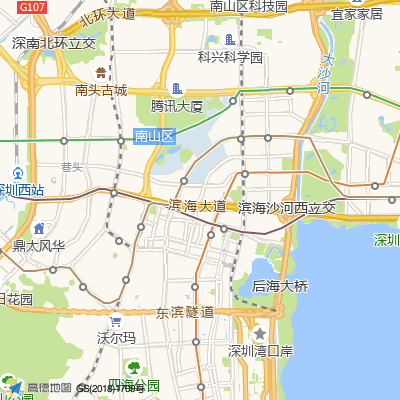

In [87]:
# zoom1-17,zoom越大图缩放越小
staticmap(location=腾讯滨海大厦_location,zoom=12)  

### 坐标转换
> 坐标转换是一类简单的HTTP接口，能够将用户输入的非高德坐标（GPS坐标、mapbar坐标、baidu坐标）转换成高德坐标。

In [102]:
def convert(locations:str,coordsys:str):
# coordsys可选值：gps,mapbar,baidu,autonavi（不进行转换）
    params = {
        'key':key_nav,
        'coordsys':coordsys,
        'locations':locations,
        'output':'json'
    }
    r = requests.get ("https://restapi.amap.com/v3/assistant/coordinate/convert?parameters", params=params)
    data = r.json()['locations']
    return data

In [103]:
convert("116.481499,39.990475|116.481499,39.990375","gps")

'116.487585177952,39.991754014757;116.487585177952,39.991653917101'

### 天气查询
> 天气查询是一个简单的HTTP接口，根据用户输入的adcode，查询目标区域当前/未来的天气情况。

- 根据用户指定的目标检索数据库。

In [100]:
def weather(city,extensions):
# extensions可选值：base:返回实况天气 all:返回预报天气
    url = "https://restapi.amap.com/v3/weather/weatherInfo?parameters"
    params = {
        'key':key_nav,
        'city':city,
        'extensions':extensions,
        'output':'json'
    }
    r = requests.get (url,params=params)
    data = r.json()
    return data

In [101]:
weather('深圳','base')

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '广东',
   'city': '深圳市',
   'adcode': '440300',
   'weather': '阴',
   'temperature': '19',
   'winddirection': '东南',
   'windpower': '≤3',
   'humidity': '100',
   'reporttime': '2020-04-23 10:52:35'}]}

### 输入提示
> 输入提示是一类简单的HTTP接口，提供根据用户输入的关键词查询返回建议列表。

- 关键字补全

In [104]:
def inputtips(keywords):
    url = "https://restapi.amap.com/v3/assistant/inputtips?parameters"
    params = {
        'key':key_nav,
        'keywords':keywords,
        'output':'json'
    }
    r = requests.get(url,params=params)
    data = r.json()
    return data

In [105]:
inputtips("腾讯")

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': 'B02F37W6PN',
   'name': '腾讯',
   'district': '广东省深圳市南山区',
   'adcode': '440305',
   'location': '113.934576,22.540487',
   'address': '深南大道10000号',
   'typecode': '170200',
   'city': []},
  {'id': 'B000A8W0Q9',
   'name': '腾讯汇',
   'district': '北京市朝阳区',
   'adcode': '110105',
   'location': '116.451116,39.917297',
   'address': '东大桥路10号世贸天阶北侧世界城西侧',
   'typecode': '170200',
   'city': []},
  {'id': 'B0FFFDNUNN',
   'name': '腾讯',
   'district': '广东省深圳市南山区',
   'adcode': '440305',
   'location': '113.944440,22.547470',
   'address': '粤海街道科技园中区科苑路15号科兴科学园C栋C2单元1楼',
   'typecode': '170206',
   'city': []},
  {'id': 'B000AA1HBI',
   'name': '腾讯网',
   'district': '北京市海淀区',
   'adcode': '110108',
   'location': '116.307466,39.984319',
   'address': '北四环西路66号中国技术交易大厦A座',
   'typecode': '170206',
   'city': []},
  {'id': 'B02F80OSFJ',
   'name': '腾讯公园',
   'district': '广东省中山市',
   'adcode': '442000',
   'loc

### 交通态势
> 交通态势是一类简单的HTTP接口，提供根据用户输入的内容能够返回希望查询的交通态势情况。

- 根据用户输入的坐标对，运用计算机视觉对图像进行分析，判断流量大小、密集程度进行路况反馈。

In [107]:
def traffic(rectangle,level): # rectangle:矩形区域查询 左下右上顶点坐标对
        '''1：高速（京藏高速）
        2：城市快速路、国道(西三环、103国道)
        3：高速辅路（G6辅路）
        4：主要道路（长安街、三环辅路路）
        5：一般道路（彩和坊路）
        6：无名道路
        ''' 
    url = "https://restapi.amap.com/v3/traffic/status/rectangle?parameters"
    params = {
        'key':key_nav,
        'level':level, 
        'rectangle':rectangle,
        'output':'json'
    }
    r = requests.get(url,params=params)
    data = r.json()
    return data

In [110]:
traffic("116.351147,39.966309;116.357134,39.968727","2")

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北三环路：双向畅通。',
  'evaluation': {'expedite': '100.00%',
   'congested': '0.00%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '1',
   'description': '整体畅通'}}}

### 地理围栏
- 适用于需要针对特定区域，监控用户位置与区域关系的场景中
- 签到打卡、共享单车等

In [124]:
def geofence(name,center): 

    url = "https://restapi.amap.com/v4/geofence/meta?key=d874136fcd77741f3cad8d66bd30a592"
    params = {
        "name": "怡翠晋盛",
        "center": center,
        "enable": "true",
        "alert_condition": "enter;leave"
    }
    r = requests.get(url,params=params)
    data = r.json()
    return data

In [125]:
geofence("怡翠晋盛", "113.135555,22.958271")

{'data': {'page_no': 1, 'page_size': 20, 'rs_list': [], 'total_record': 0},
 'errcode': 0,
 'errdetail': None,
 'errmsg': 'OK',
 'ext': None}

### 轨迹纠编

In [135]:
def driving(x,y,ag,tm,sp): 

    url = "https://restapi.amap.com/v4/grasproad/driving"
    params = {
        'key':key_nav,
        'x':x,
        'y':y,
        'ag':ag,
        'tm':tm,
        'sp':sp,
    }
    r = requests.get(url,params=params)
    data = r.json()
    return data

In [136]:
driving("113.135555","22.958271","110","4","3")

{'errcode': 20003,
 'errdetail': '未知错误，请联系高德地图开放平台技术支持',
 'errmsg': 'UNKNOWN_ERROR'}

## 简单的应用——游乐园助手
### 调用API
- 天气查询
- 搜索POI
- 路径规划
- IP定位
- 轨迹纠编

### 产品需求
- 一个好的游玩体验需要满足两个条件，一是游玩时间长，二是玩得尽兴，空手而去，满载而归。可一旦碰上阴雨酷热的坏天气，游客便不得不花钱将多余的衣物存进储物柜，或拖在身边成为累赘，更糟糕的是高昂的票价换来的欢乐时光有可能被雨水在中途打断。结合高德API打造的天气查询功能能够将温度，湿度和阴晴事先告知游客，并给出相关的穿着及出游建议。
- 虽然每个游乐园都有纸质地图派发给游客，但总会有很多路痴游客看着路线交错的地图在风中凌乱。而摩肩接踵的游乐园也常常使游客和亲朋好友“失散”。在范围大，人多且器械多的游乐园，结合高德地图API提供一个清晰的路线指引和定位搜索能够在很大程度上解决这一痛点。

### 产品描述
- 出游准备：用户通过搜索目的地，应用根据IP定位及天气查询告知近三天天气状况，产品反馈合适出游指数、穿着搭配建议及风险提示。
- 路线指引：用户通过搜索目的地，应用根据路径规划给出路线指引，若用户偏离轨迹，则根据轨迹纠编进行语音提示及路线的重新规划。
- 附近项目查询：用户开启位置定位，搜索周边项目，应用根据搜索POI返回项目名称、评价以及排队人数。
- 该应用提供语音功能，用户可以选择开启与否。